Car Evaluation: https://www.archive.ics.uci.edu/dataset/19/car+evaluation

In [ ]:
# Regular Imports:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay


In [ ]:
# Downloading the data:

df = pd.read_csv("https://archive.ics.uci.edu/static/public/19/data.csv")

In [ ]:
# Checking some data statistics:

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [ ]:
df.describe()

,buying,maint,doors,persons,lug_boot,safety,class
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,vhigh,vhigh,2,2,small,low,unacc
freq,432,432,432,576,576,576,1210


In [ ]:
df

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [ ]:
# Checking for null and duplicate values:

df.isna().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
# Checking for unique values as mostly columns are categorical:

df['buying'].unique()

array(['vhigh', 'high', 'med', 'low'], dtype=object)

In [ ]:
df['doors'].unique()

array(['2', '3', '4', '5more'], dtype=object)

In [ ]:
df['maint'].unique()

array(['vhigh', 'high', 'med', 'low'], dtype=object)

In [ ]:
df['persons'].unique()

array(['2', '4', 'more'], dtype=object)

In [ ]:
df['lug_boot'].unique()

array(['small', 'med', 'big'], dtype=object)

In [ ]:
df['safety'].unique()

array(['low', 'med', 'high'], dtype=object)

In [ ]:
df['class'].unique()

array(['unacc', 'acc', 'vgood', 'good'], dtype=object)

Converting all columns to numerical, may be required ahead for some algorithms. Not necessarily in case of tree classifiers. This could have been also done using one-hot encoding, but this will only increase features.

In [ ]:
df['buying'].replace(['low', 'med', 'high', 'vhigh'], [1,2,3,4], inplace=True)

In [ ]:
df['doors'].replace(['2', '3', '4', '5more'], [2,3,4,5], inplace=True)

In [ ]:
df['maint'].replace(['low', 'med', 'high','vhigh'], [1,2,3,4], inplace=True)

In [ ]:
df['persons'].replace(['2', '4', 'more'], [2,4,5], inplace=True)

In [ ]:
df['lug_boot'].replace(['small', 'med', 'big'], [1,2,3], inplace=True)

In [ ]:
df['safety'].replace(['low', 'med', 'high'], [1,2,3], inplace=True)

In [ ]:
df['class'].replace(['unacc', 'acc', 'good', 'vgood', ], [1,2,3,4], inplace=True)

In [ ]:
df

,buying,maint,doors,persons,lug_boot,safety,class
0,4,4,2,2,1,1,1
1,4,4,2,2,1,2,1
2,4,4,2,2,1,3,1
3,4,4,2,2,2,1,1
4,4,4,2,2,2,2,1
...,...,...,...,...,...,...,...
1723,1,1,5,5,2,2,3
1724,1,1,5,5,2,3,4
1725,1,1,5,5,3,1,1
1726,1,1,5,5,3,2,3


<Axes: >

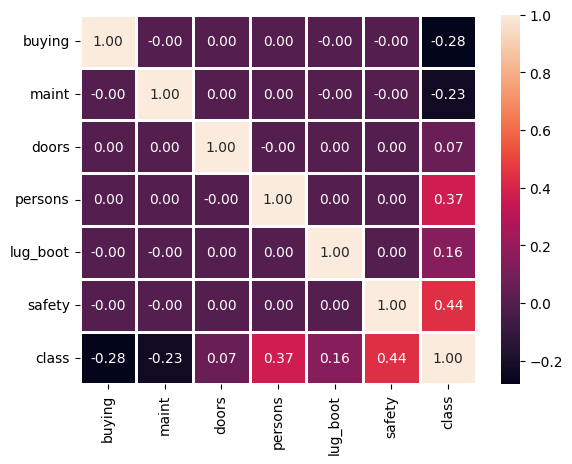

In [ ]:
sns.heatmap(df.corr(), annot=True, linewidths=2, square=False, fmt=".2f")

In [ ]:
# Seperating features and target:

X = df.drop('class', axis=1)

y = df['class']

In [ ]:
# Train / test splits:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [ ]:
# Creating a RF Classifier object:

model = RandomForestClassifier(n_estimators=10, max_features='auto', random_state=101)

In [ ]:
# Fitting the model:

model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(max_features='auto', n_estimators=10, random_state=101)

In [ ]:
# Predictions on test data:

preds = model.predict(X_test)

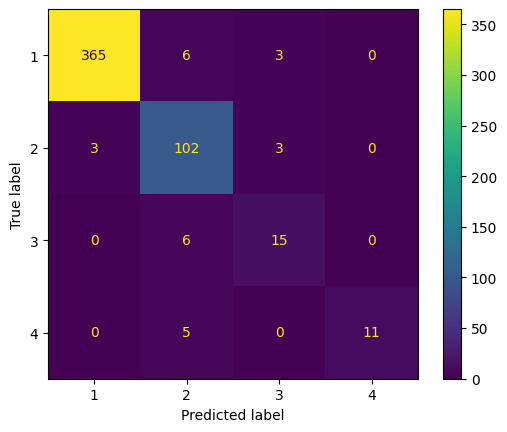

In [ ]:
# Evaluation Metrices:

ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)

In [ ]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           1       0.99      0.98      0.98       374
           2       0.86      0.94      0.90       108
           3       0.71      0.71      0.71        21
           4       1.00      0.69      0.81        16

    accuracy                           0.95       519
   macro avg       0.89      0.83      0.85       519
weighted avg       0.95      0.95      0.95       519



The accuracy reported here is 95%, let's see if we can improvize it using a grid search for best parameters.

In [ ]:
# Setting up some parameters to check on:

n_estimators=[5,10,20,40,40,50,60,80] # number of trees to unfold.
max_features= [2,3,4,5,6,7] # number of random features to be selected.
bootstrap = [True] # Random shuffling.
oob_score = [True] # Out of bag error.

In [ ]:
# Creating a pipeline:

param_grid = {'n_estimators':n_estimators,
             'max_features':max_features,
             'bootstrap':bootstrap,
             'oob_score':oob_score}  # Note, oob_score only makes sense when bootstrap=True!

In [ ]:
# Creating a RF Clasifier & Grid Search object:

rfc = RandomForestClassifier()
grid = GridSearchCV(rfc, param_grid)

In [ ]:
# Fitting the new model:

grid.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too fe

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True],
                         'max_features': [2, 3, 4, 5, 6, 7],
                         'n_estimators': [5, 10, 20, 40, 40, 50, 60, 80],
                         'oob_score': [True]})

In [ ]:
# Getting the best parameters found:

grid.best_params_

{'bootstrap': True, 'max_features': 5, 'n_estimators': 10, 'oob_score': True}

In [ ]:
# Predicting again:

predictions = grid.predict(X_test)

In [ ]:
# Out of Bag error:

grid.best_estimator_.oob_score_

0.9611248966087675

In [ ]:
# Evaluation Metrices:

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           1       0.99      0.98      0.99       374
           2       0.94      0.94      0.94       108
           3       0.80      0.95      0.87        21
           4       1.00      0.88      0.93        16

    accuracy                           0.97       519
   macro avg       0.93      0.94      0.93       519
weighted avg       0.97      0.97      0.97       519



Here we can see an improvement in accuracy from 95% to 98%.

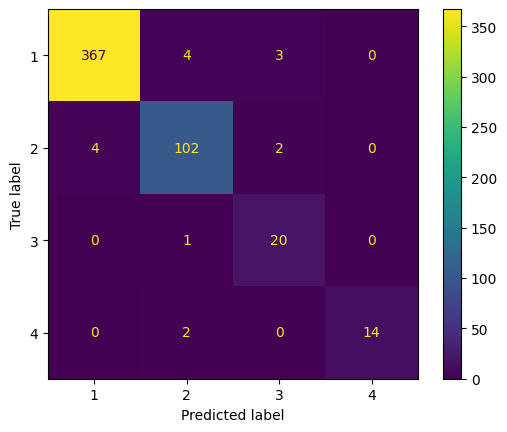

In [ ]:
ConfusionMatrixDisplay.from_estimator(grid, X_test, y_test)

In [ ]:
# Trying different number of estimates and recording error:

errors = []
misclassifications = []

for n in range(1,64):
    rfc = RandomForestClassifier(n_estimators=n, bootstrap=True, max_features= 7)
    rfc.fit(X_train, y_train)
    preds = rfc.predict(X_test)
    err = 1 - accuracy_score(preds, y_test)
    n_missed = np.sum(preds != y_test) # watch the video to understand this line!!
    errors.append(err)
    misclassifications.append(n_missed)

Text(0, 0.5, 'Error')

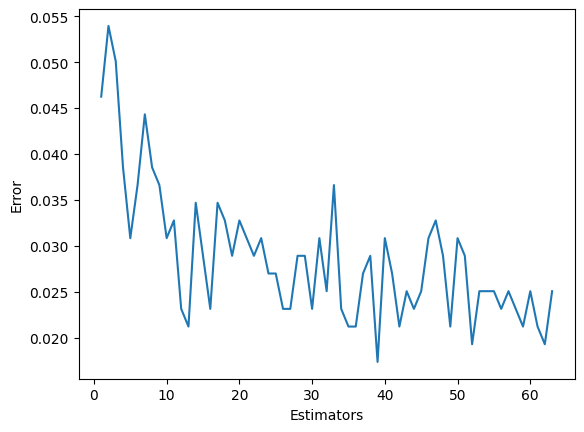

In [ ]:
# Error graph vs. Estimators:

plt.plot(range(1,64), errors)
plt.xlabel('Estimators')
plt.ylabel('Error')

In [ ]:
# Checking for a new instance:

a = np.array([4,4,2,2,1,1]).reshape(1,-1) # Reshaping to an array and then just a row. It Should predict class 1 or array([1]).

In [ ]:
grid.predict(a)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1])

It correctly classified as class 1.